In [2]:
# Useful packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fol
import plotly.express as pex

In [3]:
# Data loading

train_titanic=pd.read_csv("train.csv")

test_titatinic=pd.read_csv("test.csv")

In [4]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data description

We have eleven variables:

    - PassengerId: Primary key that are unique for each passenger
    - Survived: feature that gives information about the status of a passenger after accident,
    (0/1)-(Died/Survived)
    - Pclass: The class that the passager was embarked
    - Name: Name of the passenger
    - Sex: gender of the passenger
    - Age : Age of passenger
    - SibSp: Number of siblings/spouse on board of titanic
    - Parch: Number of parent/children on board of titanic
    - Ticket: Ticket number
    - Fare: Price of passenger's ticket 
    - Cabin: Cabin number
    - Embarked: Port of embarkation

In [6]:
train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have three variables which have some missing values. Quite higher for Cabin variable and Age with 687 and 177 NaN respectively.

## Univariate analysis

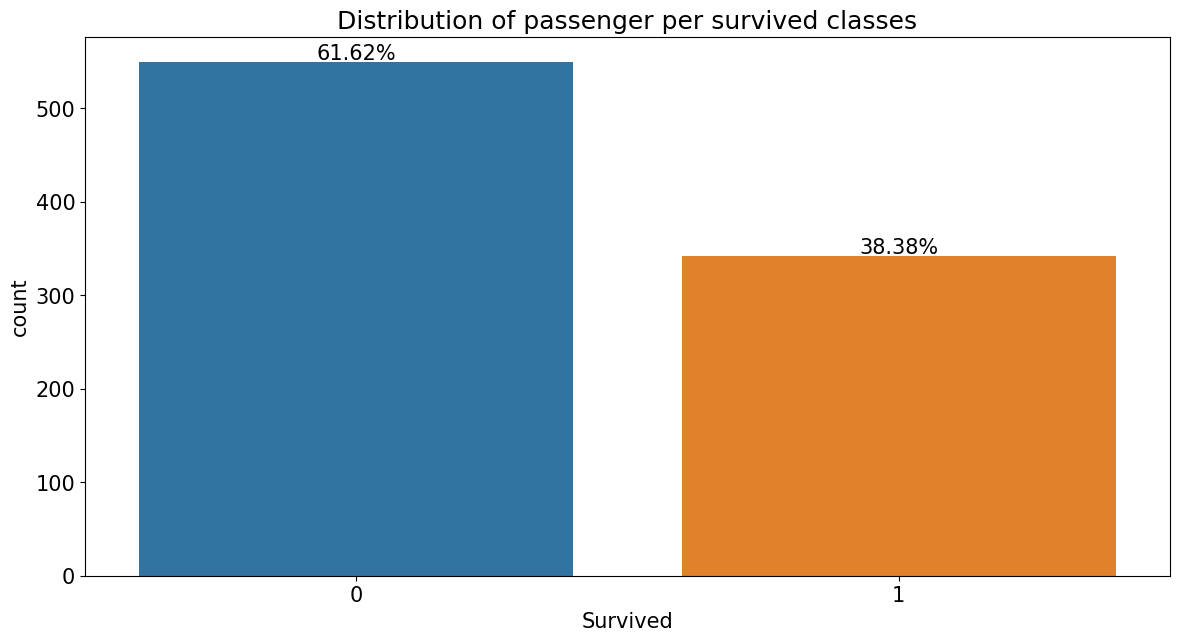

In [7]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.title("Distribution of passenger per survived classes")
ax=sns.countplot(train_titanic,x='Survived')
total=train_titanic.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

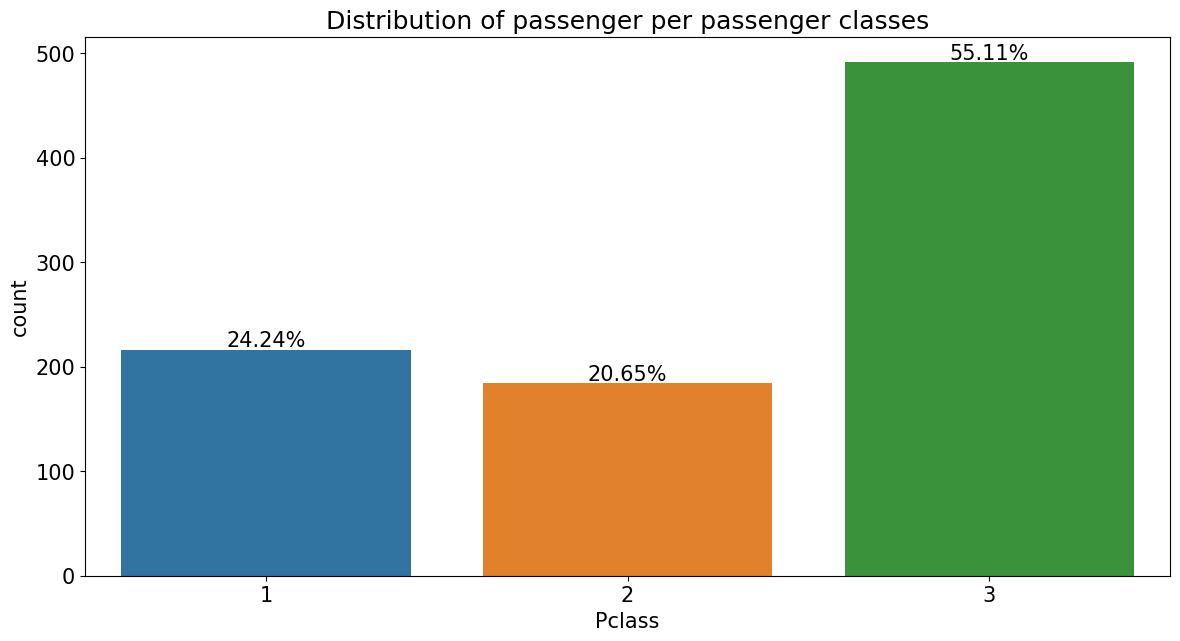

In [8]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.title("Distribution of passenger per passenger classes")
ax=sns.countplot(data=train_titanic,x='Pclass')
total=train_titanic.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

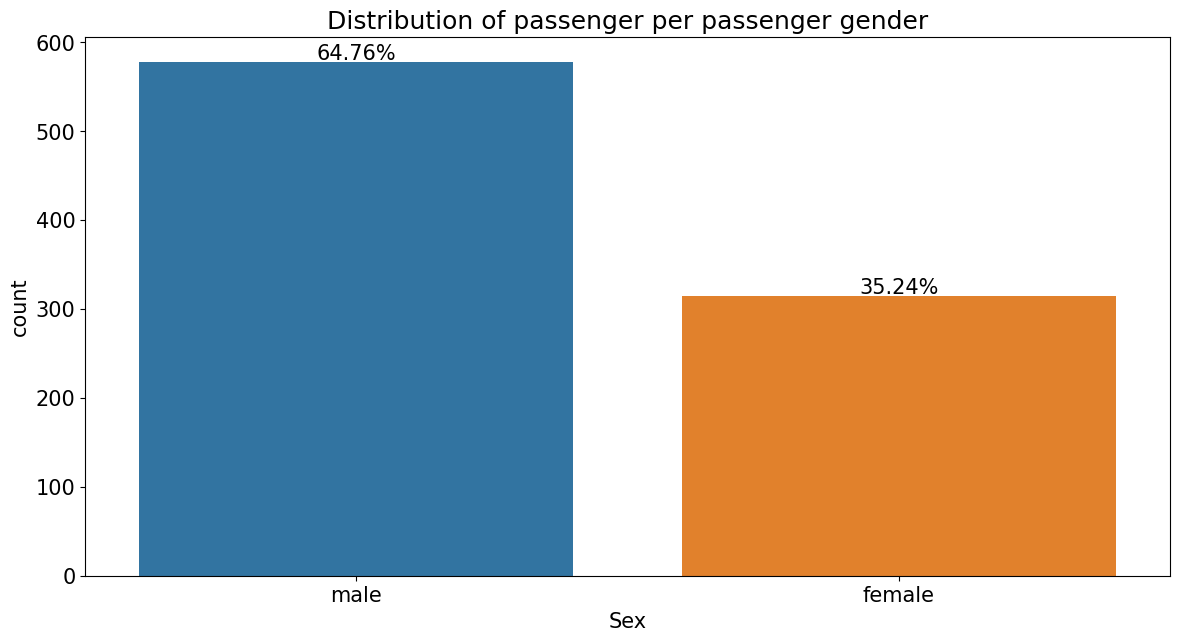

In [9]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.title("Distribution of passenger per passenger gender")
ax=sns.countplot(data=train_titanic,x='Sex')
total=train_titanic.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

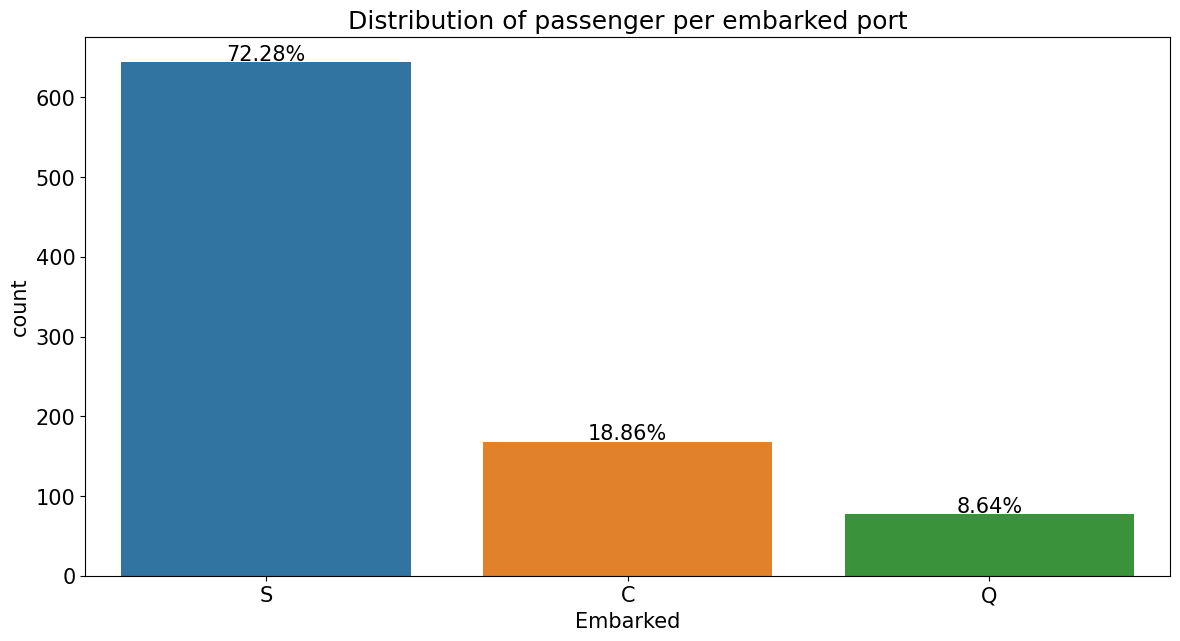

In [10]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.title("Distribution of passenger per embarked port")
ax=sns.countplot(data=train_titanic,x='Embarked')
total=train_titanic.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

## Bivariate analysis

In [11]:
corr=train_titanic.drop(columns=['PassengerId']).corr()

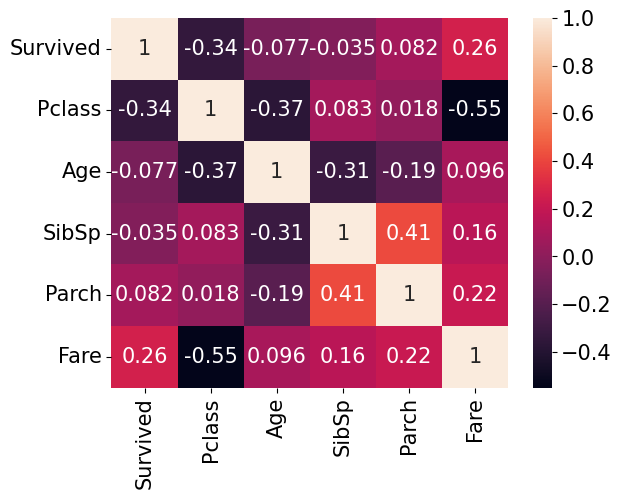

In [12]:
sns.heatmap(corr,annot=True)
plt.show()

In [13]:
train_titanic['Pclass']=train_titanic['Pclass'].astype('category')
train_titanic_numeric=pd.get_dummies(train_titanic.drop(columns=['PassengerId','Name','Ticket','Cabin']))

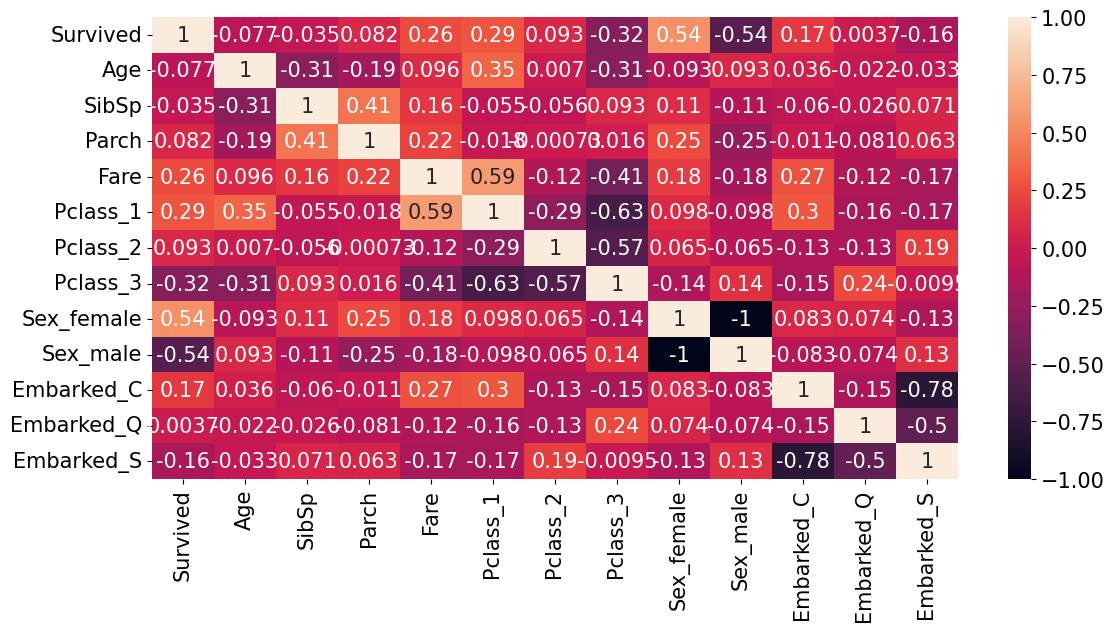

In [14]:
corr_quite=train_titanic_numeric.corr()

plt.figure(figsize=(13,6))
sns.heatmap(corr_quite,annot=True)
plt.show()

This correlation matrix details more the chance of survive of passenger based on the allowed attributes. First of all, female were lucky, they have a high probability to survive than male in the accident. After gender lucky, coming class that the passenger was sat, more you get top class more your chance of survive is high, specifically for those in the first class. As we know that fare and pclass are positively associated, more richer or you pay more you have more chance to survive. Place of embarkation also influences the chance of survive, as we can read on the above matrix, passenger of Cherbourg get more chance than others.

Otherwise according to the correlation analysis, more you get older, more you have siblings on the board your chance of dying growth with. For places, peoples in class 3, from southampton was quite defavrorised for saving. Finally males were the most impacted that can be explained by many factors like priority when saving.


**This analysis is biaised by overreprensation for some modalities like sex, pclass 3**

In [15]:
train_titanic.drop(columns='PassengerId').pivot_table(index=['Survived','Sex'])

Age       Fare     Parch     SibSp
Survived Sex                                             
0        female  25.046875  23.024385  1.037037  1.209877
         male    31.618056  21.960993  0.207265  0.440171
1        female  28.847716  51.938573  0.515021  0.515021
         male    27.276022  40.821484  0.357798  0.385321

To go more deeper in our analyse, by this pivot table we can clearly notice that in average, `Fare` and shance of surviving strongly associated. Among female or male, for those who survived more than double of fare which ones who died. The last thing is that females paid more in average than males that can explain what we notice above but we have to check if it's not due to biais sample.

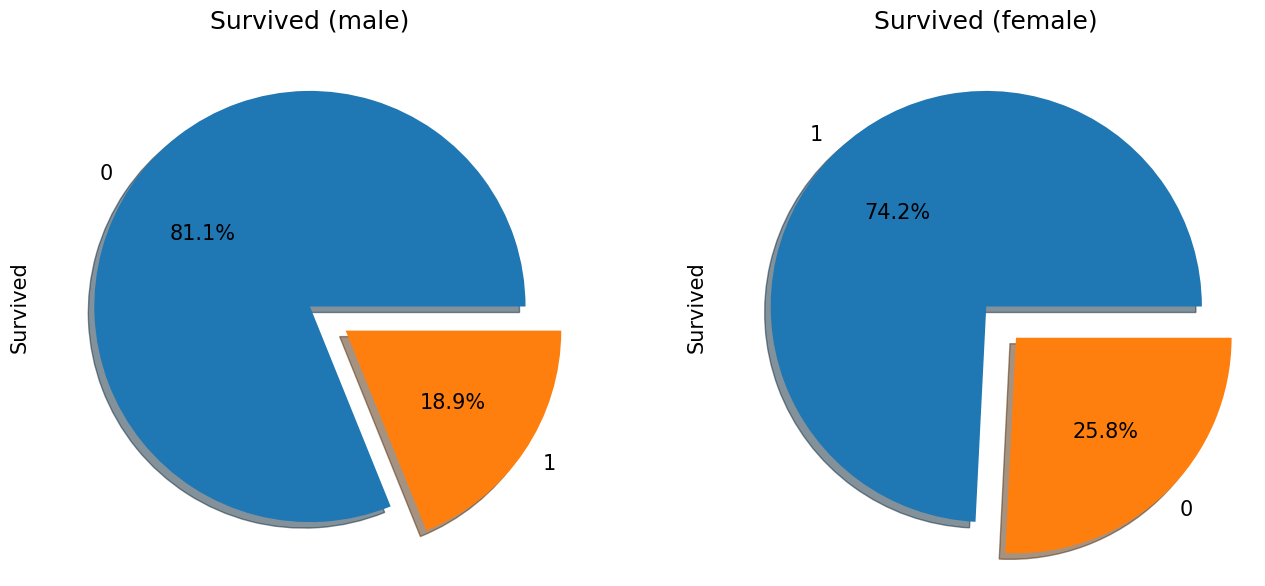

In [16]:

f,ax=plt.subplots(1,2,figsize=(16,7))
train_titanic['Survived'][train_titanic['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
train_titanic['Survived'][train_titanic['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()